<a href="https://colab.research.google.com/github/K-N-Nithin-Kumar/mla/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [302]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [303]:
data = pd.read_csv("/content/covid(NB).csv")

In [304]:
data.dtypes

no            int64
pc           object
wbc          object
mc           object
ast          object
bc           object
ldh          object
diagnosis      bool
dtype: object

In [305]:
data.describe()

,no
count,25.000000
mean,13.000000
std,7.359801
min,1.000000
25%,7.000000
50%,13.000000
75%,19.000000
max,25.000000


In [306]:
data.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [307]:
data['pc']=data['pc'].replace({"Low":0,"Normal":1,"High":2})

In [308]:
data['pc']=pd.to_numeric(data['pc'])

In [309]:
data

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,0,Low,Low,High,Normal,Normal,True
1,2,0,Low,Normal,High,Normal,High,True
2,3,0,High,Normal,High,Normal,Normal,False
3,4,0,High,Normal,High,High,Normal,True
4,5,0,Normal,High,High,Normal,Normal,False
5,6,0,Normal,Normal,High,Normal,High,True
6,7,1,Low,Low,High,Normal,Normal,True
7,8,1,High,Normal,High,Normal,Normal,False
8,9,1,High,Normal,High,High,High,True
9,10,1,Normal,High,High,Normal,Normal,False


In [310]:
data['wbc']=data['wbc'].replace({"Low":0,"Normal":1,"High":2})
data['wbc']=pd.to_numeric(data['wbc'])
data['mc'] = data['mc'].replace({'Low': 0, 'Normal': 1, 'High': 2})
data['mc']=pd.to_numeric(data['mc'])
data['ast'] = data['ast'].replace({'Low': 0, 'Normal': 1, 'High': 2})
data['ast']=pd.to_numeric(data['ast'])
data['bc'] = data['bc'].replace({'Low': 0, 'Normal': 1, 'High': 2})
data['bc']=pd.to_numeric(data['bc'])
data['ldh'] = data['ldh'].replace({'Low': 0, 'Normal': 1, 'High': 2})
data['ldh']=pd.to_numeric(data['ldh'])

In [311]:
data

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,0,0,0,2,1,1,True
1,2,0,0,1,2,1,2,True
2,3,0,2,1,2,1,1,False
3,4,0,2,1,2,2,1,True
4,5,0,1,2,2,1,1,False
5,6,0,1,1,2,1,2,True
6,7,1,0,0,2,1,1,True
7,8,1,2,1,2,1,1,False
8,9,1,2,1,2,2,2,True
9,10,1,1,2,2,1,1,False


In [312]:
X = data.drop("diagnosis",axis=1)
y = data["diagnosis"]
X_train , X_test ,y_train ,y_test = train_test_split(X,y,train_size=0.3,random_state=42)

In [313]:
model = MultinomialNB()
model.fit(X_train , y_train)

MultinomialNB()

In [314]:
y_pred = model.predict(X_test)
lr_probs = model.predict_proba(X_test)

lr_probs
lr_probs = lr_probs[:, 1]
lr_probs

array([0.77109704, 0.4552084 , 0.76157466, 0.23466303, 0.47897076,
       0.61894646, 0.64719705, 0.84739274, 0.36186088, 0.79161528,
       0.75947544, 0.51344089, 0.46854588, 0.75712154, 0.72578338,
       0.42677538, 0.45754185, 0.43711456])

In [315]:
accuracy = np.mean(y_pred==y_test)
precision = np.sum(y_pred[y_test==1]==1)/np.sum(y_pred==1)
recall = np.sum(y_pred[y_test==1]==1)/np.sum(y_test==1)
f1 = 2 * (precision*recall) / (precision+recall)

In [316]:
from sklearn.metrics import roc_curve,auc

In [317]:
fpr,tpr,thresholds = roc_curve(y_test, lr_probs)

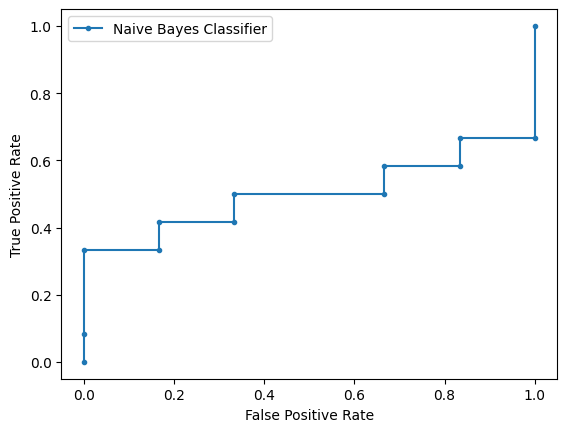

In [318]:
roc_auc = auc(fpr,tpr)
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', label='Naive Bayes Classifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [319]:
# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('ROC AUC:', roc_auc)

Accuracy: 0.4444444444444444
Precision: 0.6
Recall: 0.5
F1 score: 0.5454545454545454
ROC AUC: 0.5


In [320]:
from sklearn.model_selection import validation_curve

In [321]:
param_range = np.logspace(-7,3,3)
X = data.drop('no',axis=1)

In [322]:
train_scores , valid_scores  = validation_curve(
    GaussianNB() , X , y , param_name="var_smoothing" ,param_range=param_range , cv=5
)

In [323]:
train_scores , valid_scores = validation_curve(GaussianNB(),X,y,param_name="var_smoothing",param_range=param_range,cv=5)

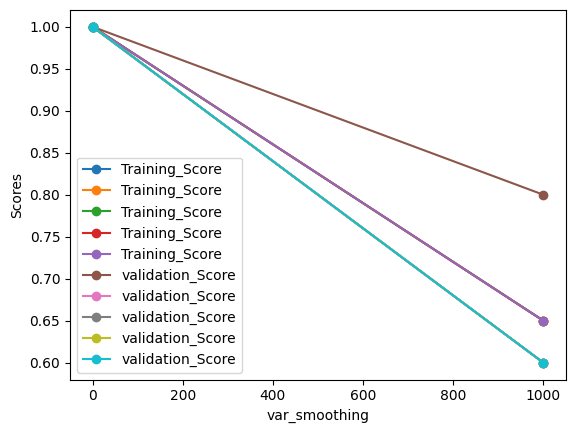

In [324]:
import matplotlib.pyplot as plt
plt.plot(param_range , train_scores , "o-" , label="Training_Score" )
plt.plot(param_range , valid_scores , "o-" ,label="validation_Score" )
plt.xlabel("var_smoothing")
plt.ylabel("Scores")
plt.legend()

In [325]:
res = pd.DataFrame(
    {"feature":list(X.columns) , "importance":model.feature_names_in_}
).sort_values("importance",ascending=False)